In [1]:
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
from astropy.table import Table
from scipy.interpolate import interp1d
from lmfit import Model

COLOR = 'k'#'#FFFAF1'
plt.rcParams['font.size'] = 18
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['xtick.major.size']  = 8 #12
plt.rcParams['ytick.major.size']  = 8 #12

plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size']  = 6
plt.rcParams['ytick.minor.size']  = 6

plt.rcParams['axes.linewidth'] = 3
lw = 5

plt.rcParams['text.color'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['legend.facecolor'] = 'none'

In [2]:
def gaussian(x, mu, std, scaling):
    denom = std * np.sqrt(2 * np.pi)
    exp = -0.5 * (x - mu)**2/std**2
    return scaling/denom * np.exp(exp)

In [4]:
summary = Table.read('mcmc/trace_planete.csv', format='csv')

In [5]:
periods = np.arange(38,56,1,dtype=int)
keys = ['logl_{}'.format(i) for i in periods]
pkeys = ['period_{}'.format(i) for i in periods]

avg = 'logl'

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


(3.67507361807504e-18, 0.01)

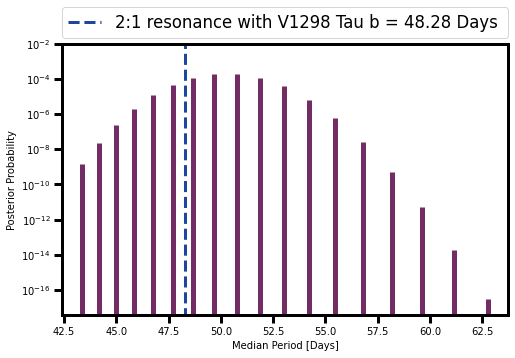

In [6]:
fig = plt.figure(figsize=(8,5))

logl = summary[summary['col0']=='logl']['mean'].data

post_prob = np.zeros(len(keys))
means = np.zeros(len(keys))

for i in range(len(keys)):

    m1 = summary[summary['col0']==pkeys[i]]['mean'].data
    
    logl_p = summary[summary['col0']==keys[i]]['mean'].data
    pp = np.exp(logl_p - logl)
    post_prob[i] = pp #+ 0.0
    means[i] = m1 + 0.0 

    plt.vlines(m1, -200, pp, lw=5, color='#742C64')


plt.vlines(24.141445*2, -200, 100, color='#1A48A0', linestyle='--', lw=3,
           label='2:1 resonance with V1298 Tau b = 48.28 Days')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", fontsize=16.5,
           borderaxespad=0.)
plt.xlabel('Median Period [Days]')
plt.ylabel('Posterior Probability')

plt.yscale('log')
plt.ylim(-20,0.01)
#plt.savefig('periode.pdf', rasterize=True, bbox_inches='tight', dpi=250)

In [9]:
args = np.flip(np.argsort(post_prob))

In [10]:
post_prob[args]

array([1.88012896e-04, 1.87824977e-04, 1.14721856e-04, 1.10223548e-04,
       4.45009509e-05, 3.62525802e-05, 1.13988282e-05, 6.39496242e-06,
       1.99672943e-06, 5.78978785e-07, 2.47216838e-07, 2.56428771e-08,
       2.22928464e-08, 1.50571194e-09, 5.31669000e-10, 4.91367000e-12,
       1.93516250e-14, 3.09549114e-17])

In [13]:
means[args], np.nanstd(means[args])

(array([50.748, 49.691, 48.677, 51.852, 47.703, 53.004, 46.768, 54.208,
        45.869, 55.469, 45.003, 56.79 , 44.17 , 43.367, 58.175, 59.629,
        61.158, 62.768]), 5.883820378801515)

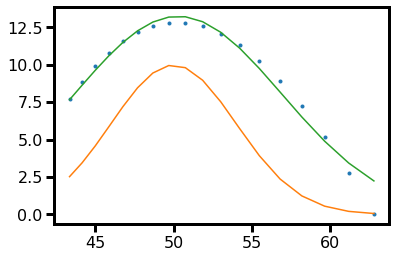

In [104]:
gmodel = Model(gaussian)
params = gmodel.make_params()
y = np.log10(post_prob)-np.nanmin(np.log10(post_prob))

plt.plot(means, y, '.')
y_eval = gmodel.eval(x=means, mu=50, std=4, scaling=100)
plt.plot(means, y_eval)

result = gmodel.fit(y,
                    x=means, mu=50, std=4, scaling=100)
plt.plot(means, result.best_fit)

In [105]:
result.minimize()

In [100]:
y

array([ 0.        ,  2.79598787,  5.20067642,  7.23491177,  8.91823719,
       10.27193309, 11.31510843, 12.06860936, 12.55154482, 12.78345807,
       12.78302378, 12.5689166 , 12.15763973, 11.56613064, 10.80958965,
        9.90234848,  8.85743596,  7.68701233])

In [106]:
24.141445*2

48.28289